In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os.path
from datetime import datetime
import numpy as np
from scipy import linalg
from pylab import *
from matplotlib.backends.backend_pdf import PdfPages
import h5py
from sklearn.decomposition.factor_analysis import FactorAnalysis

from optimization import *
import simulation

In [13]:
np.random.seed(0)

T = 200
l = 1e-4
std = 1
p = 0
L = 2
N = 20

high = np.log(25 / T)
low = np.log(5 / T)

# simulate latent processes
# x, ticks = simulation.latents(L, T, std, l)
x = np.empty((T, L), dtype=float)
x[:T // 2, 0] = high
x[T // 2:, 0] = low
x[:, 1] = 2 * np.sin(np.linspace(0, 2 * np.pi * 5, T))
for l in range(L):
    x[:, l] -= np.mean(x[:, l])

# simulate spike trains
# a = np.empty((L, N), dtype=float)
a = 2 * np.random.rand(L, N) - 1
for l in range(L):
    a[l, :] /= linalg.norm(a[l, :]) / np.sqrt(N)

b = np.empty((1 + p, N))
# b[0, :] = np.diag(np.dot(a.T, (a < 0) * -(high + low)))
b[0, :] = low
y, _, rate = simulation.spikes(x, a, b, intercept=True)


Iteration[2]:
lower bound = -4170.70997
increment = 46031190919.5588531494
change in alpha = 0.0000000000
change in beta = 0.9999991380
change in posterior mean = 0.3503595245
change in posterior covariance = 4.9999996179

Iteration[3]:
lower bound = -918.04499
increment = 3252.6649825561
change in alpha = 1.5496849465
change in beta = 1.3846763419
change in posterior mean = 0.8380306279
change in posterior covariance = 0.0797720354

Iteration[4]:
lower bound = -831.81830
increment = 86.2266893945
change in alpha = 1.1260313697
change in beta = 1.5650259101
change in posterior mean = 2.1851170111
change in posterior covariance = 0.0583619812

Iteration[5]:
lower bound = -820.65303
increment = 11.1652703733
change in alpha = 0.8405776332
change in beta = 2.2234406367
change in posterior mean = 1.5492048947
change in posterior covariance = 0.0748749667

Iteration[6]:
lower bound = -811.13514
increment = 9.5178857735
change in alpha = 0.9807419979
change in beta = 0.6348384441
change in 

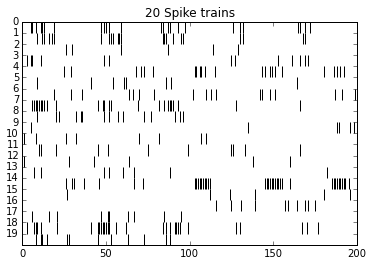

In [16]:
figure()
ylim(0, N)
for n in range(N):
    vlines(np.arange(T)[y[:, n] > 0], n, n + 1, color='black')
title('{} Spike trains'.format(N))
yticks(range(N))
gca().invert_yaxis()

In [ ]:
fa = FactorAnalysis(n_components=L)
m0 = fa.fit_transform(y)
a0 = fa.components_
# a0 = np.random.randn(L, N)
m0 *= np.linalg.norm(a0) / np.sqrt(N)
a0 /= np.linalg.norm(a0) / np.sqrt(N)

mu = np.zeros_like(x)

var = np.empty(L, dtype=float)
var[0] = 5
var[1] = 5
w = np.empty(L, dtype=float)
w[0] = 1e-3
w[1] = 1e-3

initial = {'alpha': a0,
           'beta': None,
           'posterior mean': mu}

control = {'max iteration': 20,
           'fixed-point iteration': 3,
           'tol': 1e-4,
           'verbose': True}

lbound, m, V, a1, b1, a0, b0, elapsed, converged = variational(y, 0, mu, var, w,
                                                               a0=a0,
                                                               b0=None,
                                                               m0=m0,
                                                               fixalpha=False, fixbeta=False, fixpostmean=False,
                                                               fixpostcov=False,
                                                               normofalpha=np.sqrt(N), intercept=True,
                                                               hyper=False,
                                                               control=control)

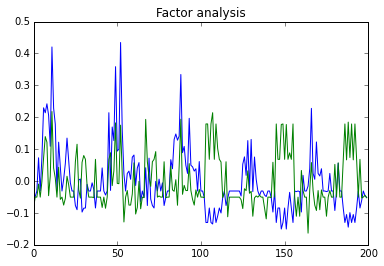

In [18]:
figure()
plot(m0)
title('Factor analysis')

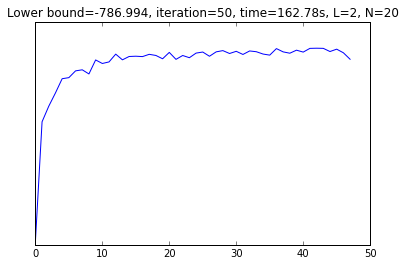

In [27]:
figure()
plot(lbound[2:])
yticks([])
title('Lower bound={:.3f}, iteration={:d}, time={:.2f}s, L={:d}, N={:d}'.format(lbound[-1], len(lbound), elapsed, L, N))

In [26]:
lbound[-1]

-786.99381107759928

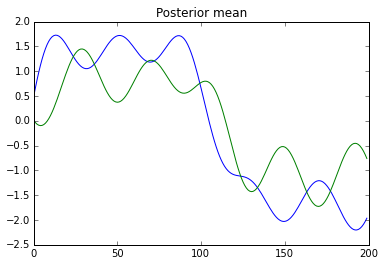

In [30]:
figure()
plot(m)
title('Posterior mean')

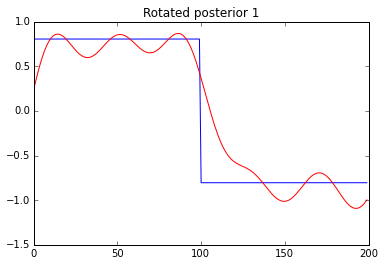

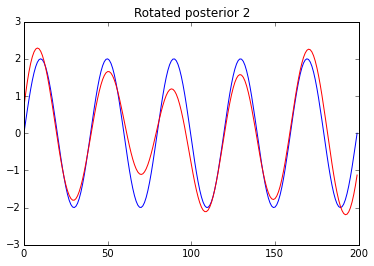

In [33]:
c = linalg.lstsq(m, x)[0]
m2 = np.dot(m, c)
for l in range(L):
    figure()
    plot(x[:, l] - np.mean(x[:, l]), label='latent', color='blue')
    plot(m2[:, l], label='transformed posterior', color='red')
    title('Rotated posterior {}'.format(l + 1))

In [116]:
ngrid = 5
v = np.logspace(-0.5, 0.3, num=ngrid, base=0.1)
grid = np.squeeze(np.dstack((np.repeat(v, ngrid), np.tile(v, ngrid))))
grid

array([[ 3.16227766,  3.16227766],
       [ 3.16227766,  1.99526231],
       [ 3.16227766,  1.25892541],
       [ 3.16227766,  0.79432823],
       [ 3.16227766,  0.50118723],
       [ 1.99526231,  3.16227766],
       [ 1.99526231,  1.99526231],
       [ 1.99526231,  1.25892541],
       [ 1.99526231,  0.79432823],
       [ 1.99526231,  0.50118723],
       [ 1.25892541,  3.16227766],
       [ 1.25892541,  1.99526231],
       [ 1.25892541,  1.25892541],
       [ 1.25892541,  0.79432823],
       [ 1.25892541,  0.50118723],
       [ 0.79432823,  3.16227766],
       [ 0.79432823,  1.99526231],
       [ 0.79432823,  1.25892541],
       [ 0.79432823,  0.79432823],
       [ 0.79432823,  0.50118723],
       [ 0.50118723,  3.16227766],
       [ 0.50118723,  1.99526231],
       [ 0.50118723,  1.25892541],
       [ 0.50118723,  0.79432823],
       [ 0.50118723,  0.50118723]])

In [117]:
lb4v = np.empty(ngrid ** 2)
for i in range(ngrid ** 2):
    lbound, m, V, a1, b1, a0, b0, elapsed, converged = variational(y, 0, mu, grid[i, :], w,
                                                               a0=a0,
                                                               b0=None,
                                                               m0=m0,
                                                               fixalpha=False, fixbeta=False, fixpostmean=False,
                                                               fixpostcov=False,
                                                               normofalpha=np.sqrt(N), intercept=True,
                                                               hyper=False,
                                                               control=control)
    lb4v[i] = lbound[-1]


Iteration[2]:
lower bound = -1839.37933
increment = 199710008587.6876525879
change in alpha = 0.0000000000
change in beta = 0.9999260286
change in posterior mean = 0.4011826867
change in posterior covariance = 3.1622521205

Iteration[3]:
lower bound = -910.79827
increment = 928.5810563000
change in alpha = 1.5607923406
change in beta = 1.3846847292
change in posterior mean = 0.8780724005
change in posterior covariance = 0.0799305180

Iteration[4]:
lower bound = -870.72811
increment = 40.0701680219
change in alpha = 1.0188854941
change in beta = 1.5679662955
change in posterior mean = 2.1711224717
change in posterior covariance = 0.0402451821

Iteration[5]:
lower bound = -821.48477
increment = 49.2433359615
change in alpha = 0.9578346310
change in beta = 2.6414923632
change in posterior mean = 1.1317515791
change in posterior covariance = 0.0828169020

Iteration[6]:
lower bound = -796.69636
increment = 24.7884124453
change in alpha = 0.7348937072
change in beta = 0.6532300987
change in

In [138]:
z = np.column_stack((grid, lb4v))
z

array([[  3.16227766e+00,   3.16227766e+00,  -7.77609290e+02],
       [  3.16227766e+00,   1.99526231e+00,  -7.90410577e+02],
       [  3.16227766e+00,   1.25892541e+00,  -7.95076581e+02],
       [  3.16227766e+00,   7.94328235e-01,  -7.96503446e+02],
       [  3.16227766e+00,   5.01187234e-01,   2.52380668e+11],
       [  1.99526231e+00,   3.16227766e+00,  -7.90109337e+02],
       [  1.99526231e+00,   1.99526231e+00,  -7.96985344e+02],
       [  1.99526231e+00,   1.25892541e+00,  -8.05772217e+02],
       [  1.99526231e+00,   7.94328235e-01,  -8.11476398e+02],
       [  1.99526231e+00,   5.01187234e-01,   2.52380668e+11],
       [  1.25892541e+00,   3.16227766e+00,  -7.99015943e+02],
       [  1.25892541e+00,   1.99526231e+00,  -8.07985772e+02],
       [  1.25892541e+00,   1.25892541e+00,  -8.18528539e+02],
       [  1.25892541e+00,   7.94328235e-01,  -8.19519911e+02],
       [  1.25892541e+00,   5.01187234e-01,  -8.24189160e+02],
       [  7.94328235e-01,   3.16227766e+00,  -7.9744605

In [139]:
mz = z[np.ma.masked_less(lb4v, 0).mask, :]
mz

array([[  3.16227766e+00,   3.16227766e+00,  -7.77609290e+02],
       [  3.16227766e+00,   1.99526231e+00,  -7.90410577e+02],
       [  3.16227766e+00,   1.25892541e+00,  -7.95076581e+02],
       [  3.16227766e+00,   7.94328235e-01,  -7.96503446e+02],
       [  1.99526231e+00,   3.16227766e+00,  -7.90109337e+02],
       [  1.99526231e+00,   1.99526231e+00,  -7.96985344e+02],
       [  1.99526231e+00,   1.25892541e+00,  -8.05772217e+02],
       [  1.99526231e+00,   7.94328235e-01,  -8.11476398e+02],
       [  1.25892541e+00,   3.16227766e+00,  -7.99015943e+02],
       [  1.25892541e+00,   1.99526231e+00,  -8.07985772e+02],
       [  1.25892541e+00,   1.25892541e+00,  -8.18528539e+02],
       [  1.25892541e+00,   7.94328235e-01,  -8.19519911e+02],
       [  1.25892541e+00,   5.01187234e-01,  -8.24189160e+02],
       [  7.94328235e-01,   3.16227766e+00,  -7.97446058e+02],
       [  7.94328235e-01,   1.99526231e+00,  -8.11828533e+02],
       [  7.94328235e-01,   1.25892541e+00,  -8.1917040

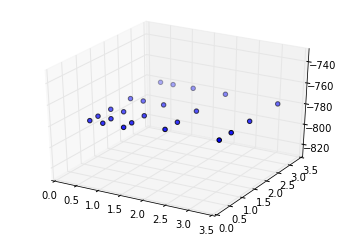

In [140]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mz[:, 0], mz[:, 1], mz[0, 2])

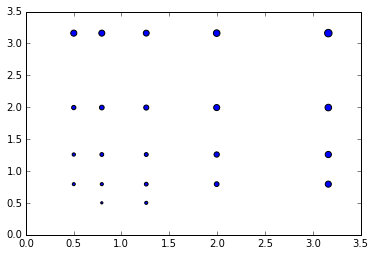

In [165]:
figure()
scatter(mz[:,0], mz[:, 1], s=mz[:, 2] - np.min(mz[:, 2]))